## Observations and Insights 

In [ ]:
# ?s: outlier color for box and whiskers, one mouse for the line plot?

In [ ]:
# Observations:
# Overtime, tumor volume decreased with in mice who were receiving the drug Capomulin.
# With those mice who were taking Capomulin, there is a statitstically significant correlation between tumor volume and weight.
# In this study, there was a pretty even representation of male and female mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
complete_data = complete_data.sort_values(['Timepoint'])
# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1529,s619,Stelasyn,Male,22,30,0,45.0,0
558,a818,Naftisol,Female,12,28,0,45.0,0
1531,t198,Propriva,Male,22,26,0,45.0,0
551,a788,Zoniferol,Male,5,30,0,45.0,0


In [2]:
# Checking the number of mice.
mouse_count = complete_data['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_data.duplicated(['Mouse ID', 'Timepoint'])

In [4]:
duplicate_data = complete_data.loc[duplicates]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
complete_data.loc[complete_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
908,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=complete_data.loc[complete_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1529,s619,Stelasyn,Male,22,30,0,45.000000,0
558,a818,Naftisol,Female,12,28,0,45.000000,0
1531,t198,Propriva,Male,22,26,0,45.000000,0
551,a788,Zoniferol,Male,5,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
174,a644,Ramicane,Female,7,17,45,32.978522,1
679,c402,Stelasyn,Female,1,27,45,74.040390,3
689,c559,Zoniferol,Female,19,28,45,61.840058,4
706,c757,Placebo,Male,9,27,45,69.042841,3


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [8]:
# Create basic summary table with Drug types and trial numbers
summary_stats = pd.DataFrame(clean_data.groupby('Drug Regimen').count())

# Calculate summary statistics by drug type
summary_stats['Mean Tumor Volume'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
summary_stats['Median Tumor Volume'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
summary_stats['Tumor Volume Variance'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
summary_stats['Tumor Volume St. Dev.'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
summary_stats['Tumor Volume St. Error'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
summary_stats

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = summary_stats[['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume St. Dev.', 'Tumor Volume St. Error']]
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice')

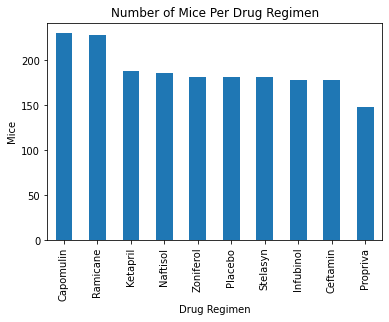

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_drug = pd.DataFrame(clean_data['Drug Regimen'].value_counts())
mice_per_drug

mice_per_drug.plot.bar(y='Drug Regimen', rot=90, legend=False)
plt.title('Number of Mice Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice')

Text(0.5, 1.0, 'Mice per Drug Regimen')

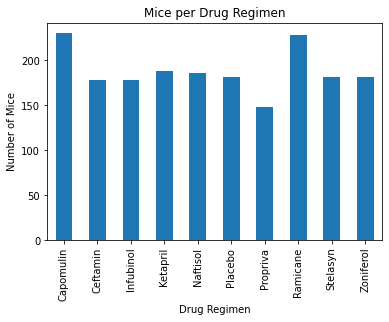

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_group = clean_data.groupby('Drug Regimen')
count_mice = drug_group['Drug Regimen'].count()
count_mice

mice_drug_chart = count_mice.plot(kind='bar')
mice_drug_chart.set_ylabel('Number of Mice')
mice_drug_chart.set_title('Mice per Drug Regimen')

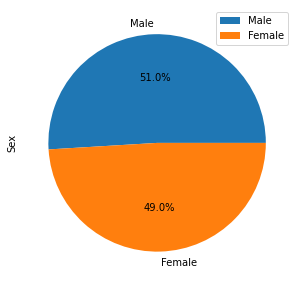

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = pd.DataFrame(clean_data['Sex'].value_counts())
mice_gender

mice_gender.plot.pie(y='Sex', figsize=(5,5), autopct='%1.1f%%')

Text(0.5, 1.0, 'Mice per Gender')

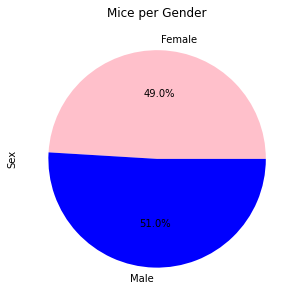

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = clean_data.groupby('Sex')
count_mice = mouse_gender['Sex'].count()
count_mice

colors=['pink', 'blue']
mouse_gender_chart = count_mice.plot(kind='pie', figsize= (5,5), autopct='%1.1f%%', colors=colors)
# mice_gender_chart.set_ylabel('Number of Mice')
mouse_gender_chart.set_title('Mice per Gender')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume (max tumor) of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Obtain the final tumor volume (max tumor) of each mouse with groupby ID and timepoint max
max_tumor = clean_data.groupby(['Mouse ID'])['Timepoint'].max()

# Put a new index number for the max tumor dataset
max_tumor = max_tumor.reset_index()

In [15]:
# Merge max_tumor with the original dataframe to get the tumor volume at the last timepoint
merged_data_set = pd.merge(max_tumor, clean_data, on=['Mouse ID', 'Timepoint'], how = 'left')
merged_data_set

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = clean_data.loc[clean_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # add subst to tumorvol
    tumorvol_list.append(final_tumor_vol)
    
    # Quartile calculation for each drug
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq-lowerq
    lower_bound = lowerq - (1.5 * IQR)
    upper_bound = upperq - (1.5 * IQR)
    
    # Find outliers for each drug
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s outliers: {outliers}")  

Capomulin's outliers: 1452    45.000000
328     45.000000
310     45.000000
300     45.000000
290     45.000000
          ...    
390     41.581521
282     38.846876
440     47.685963
164     34.455298
204     37.311846
Name: Tumor Volume (mm3), Length: 202, dtype: float64
Ramicane's outliers: 0      45.000000
448    45.000000
318    45.000000
283    45.000000
263    45.000000
         ...    
214    38.810366
154    33.397653
194    36.134852
184    33.562402
174    32.978522
Name: Tumor Volume (mm3), Length: 216, dtype: float64
Infubinol's outliers: 531     45.000000
524     45.000000
464     45.000000
668     45.000000
1480    45.000000
          ...    
540     66.083066
463     67.973419
800     62.435404
834     60.918767
637     72.226731
Name: Tumor Volume (mm3), Length: 177, dtype: float64
Ceftamin's outliers: 1551    45.000000
1577    45.000000
484     45.000000
1583    45.000000
611     45.000000
          ...    
493     62.999356
1670    67.527482
1797    61.386660
1379   

/Users/allred/anaconda3/envs/PythonData/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


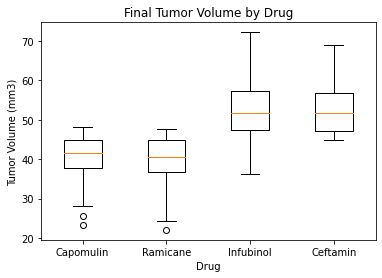

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume by Drug")
ax.set_xlabel("Drug")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(tumorvol_list)

plt.xticks([1, 2, 3, 4], drug_list)
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
campomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
campomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
328,j119,Capomulin,Female,7,23,0,45.000000,0
310,j246,Capomulin,Female,21,21,0,45.000000,0
300,b128,Capomulin,Female,9,22,0,45.000000,0
290,b742,Capomulin,Male,7,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
144,m957,Capomulin,Female,3,19,45,33.329098,1
134,r554,Capomulin,Female,8,17,45,32.377357,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
164,t565,Capomulin,Female,20,17,45,34.455298,0


In [19]:
# DataFrame for mean and SEM for Capomulin
campomulin_dataset = campomulin_data.groupby('Timepoint')['Tumor Volume (mm3)'].agg(['mean', 'sem'])
campomulin_dataset

,mean,sem
Timepoint,,
0,45.000000,0.000000
5,44.266086,0.448593
10,43.084291,0.702684
15,42.064317,0.838617
20,40.716325,0.909731
25,39.939528,0.881642
30,38.769339,0.934460
35,37.816839,1.052241
40,36.958001,1.223608


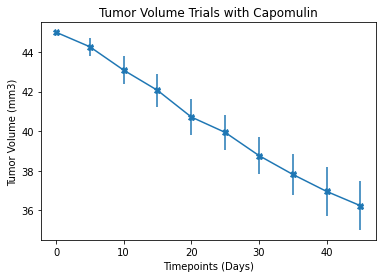

In [28]:
# Create a plot, Create x axis 
x_axis = list(campomulin_dataset.index.values)

# Create error plot with matplotlib
fig, ax = plt.subplots()
ax.errorbar(x_axis, campomulin_dataset['mean'], campomulin_dataset['sem'], linestyle = '-', marker = 'X')

# Add titles/labels
ax.set_xlabel('Timepoints (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Volume Trials with Capomulin')
plt.show()

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = campomulin_data.drop_duplicates(['Mouse ID', 'Weight (g)'], keep = 'first')
mouse_weight = mouse_weight[['Mouse ID', 'Weight (g)']]
campomulin_tumor_avg = campomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

dataset_scatter = pd.merge(mouse_weight, campomulin_tumor_avg, on = ['Mouse ID'], how = 'left')
dataset_scatter

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,r157,25,45.798970
1,j119,23,44.465236
2,j246,21,43.216925
3,b128,22,41.963636
4,b742,21,40.083699
5,l897,19,42.507261
6,g288,19,41.990097
7,w914,21,41.352452
8,v923,21,41.581595
9,i557,24,44.805810


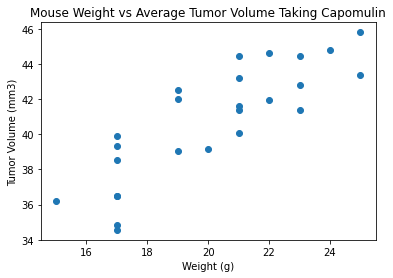

In [22]:
# Create scatter plot for mouse weight vs capomulin tumor avg
plt.scatter(dataset_scatter['Weight (g)'], dataset_scatter['Tumor Volume (mm3)'])

# Add titles and labels
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume Taking Capomulin')
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Find correlation, use st.pearsonr(x,y), {round()}
x_values = dataset_scatter['Weight (g)']
y_values = dataset_scatter['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared value is: 0.71.


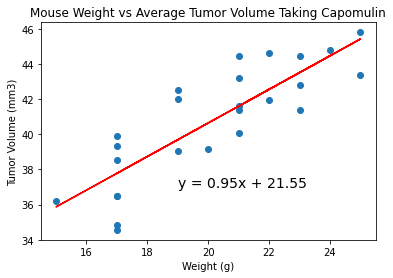

In [25]:
# Generate Linear Regression Model
x_values = dataset_scatter['Weight (g)']
y_values = dataset_scatter['Tumor Volume (mm3)']
# Need slope intercept, r and p values to equal linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values*slope) + intercept
line_equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_values, y_values)

# Add titles and labels
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume Taking Capomulin')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_equation, (19, 37), fontsize = 14, color = 'black')

print(f"The r-squared value is: {round(rvalue**2, 2)}.")